# Машинное обучение и интеллектуальные системы

# Лабораторная работа 2. Основы машинного обучения.

## Часть 1. Визуализация данных. Градиентный спуск.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from scipy.stats import distributions as ds
from IPython.display import display, Markdown, Latex

### Задание 1
#### <b>Подготовка датасета</b>

<b>Считываем датасет Davis</b>

In [2]:
davis_df = pd.read_csv("Davis.csv")

In [3]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


<b>Убираем ненужный столбец и избавляемся от строк с отсутствующими данными</b>

In [4]:
davis_df = davis_df.drop(columns="Unnamed: 0")

In [5]:
davis_df = davis_df.dropna()

In [6]:
davis_df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
194,F,62,164,61.0,161.0
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
198,M,90,181,91.0,178.0


In [7]:
sns.set(rc={"figure.figsize": (8, 6)})

<b>Строим скаттер по росту и весу и разукрашиваем точки в разные цвета в зависимости от пола</b>

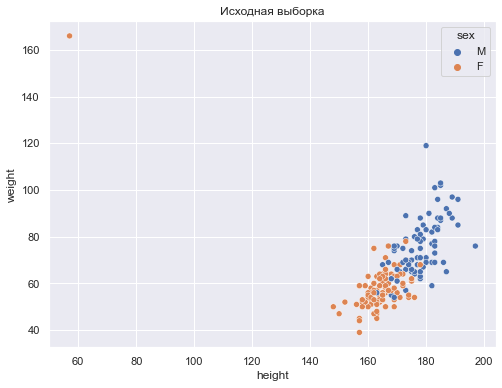

In [8]:
sns.scatterplot(data=davis_df, x=davis_df.height, y=davis_df.weight, hue=davis_df.sex).set(title='Исходная выборка');

<b>Убираем из датасета "мутанта" и еще раз строим скаттер</b>

In [9]:
davis_df = davis_df.drop(index=davis_df[davis_df.height <= 60].index);

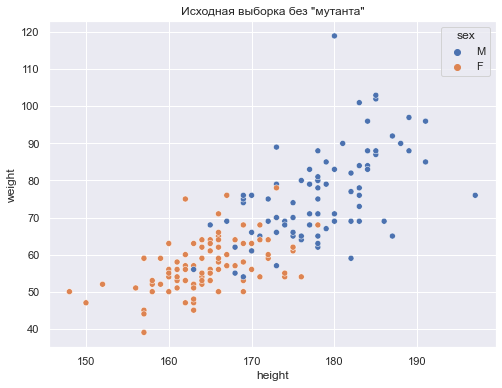

In [10]:
sns.scatterplot(data=davis_df, x="height", y="weight", hue="sex").set(title='Исходная выборка без "мутанта"');

#### <b>Разделение датасета на 2 выборки (train, test) с сохранением пропорции полов</b>

In [11]:
males_df = davis_df[davis_df.sex == 'M']
females_df = davis_df[davis_df.sex == 'F']

In [12]:
display(Markdown(f"<b>Пропорция мужчин в исходном датасете: {round(len(males_df) / len(davis_df), 4)}</b>"))
display(Markdown(f"<b>Пропорция женщин в исходном датасете: {round(len(females_df) / len(davis_df), 4)}</b>"))

<b>Пропорция мужчин в исходном датасете: 0.4556</b>

<b>Пропорция женщин в исходном датасете: 0.5444</b>

In [13]:
males_half = males_df.sample(frac=0.5)
females_half = females_df.sample(frac=0.5)

In [14]:
davis_df_train = pd.concat([males_half, females_half], ignore_index=True)

In [15]:
davis_df_test = pd.concat([males_df.drop(males_half.index), females_df.drop(females_half.index)], ignore_index=True)

In [16]:
display(Markdown(f"<b>Пропорция мужчин в train-выборке: {round((davis_df_train.sex == 'M').sum() / len(davis_df_train), 4)}</b>"))
display(Markdown(f"<b>Пропорция женщин в train-выборке: {round((davis_df_train.sex == 'F').sum() / len(davis_df_train), 4)}</b>"))

<b>Пропорция мужчин в train-выборке: 0.4556</b>

<b>Пропорция женщин в train-выборке: 0.5444</b>

In [17]:
display(Markdown(f"<b>Пропорция мужчин в test-выборке: {round((davis_df_test.sex == 'M').sum() / len(davis_df_test), 4)}</b>"))
display(Markdown(f"<b>Пропорция женщин в test-выборке: {round((davis_df_test.sex == 'F').sum() / len(davis_df_test), 4)}</b>"))

<b>Пропорция мужчин в test-выборке: 0.4556</b>

<b>Пропорция женщин в test-выборке: 0.5444</b>

#### <b>Скаттер train-выборки</b>

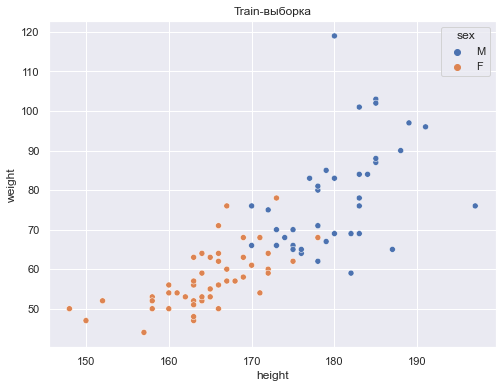

In [18]:
sns.scatterplot(data=davis_df_train, x="height", y="weight", hue="sex").set(title='Train-выборка');

#### <b>Построение гистограмм действительных роста и веса, а также величин (<i>repwt - weight</i>) и (<i>repht - height</i>)</b>

In [19]:
davis_df_train["repwt - weight"] = davis_df_train.repwt - davis_df_train.weight
davis_df_train["repht - height"] = davis_df_train.repht - davis_df_train.height

In [20]:
def make_hists(data, attributes, row, palette=sns.color_palette()[:2]):
    for col, attr in enumerate(attributes):
        sns.histplot(data=data, x=attr, hue="sex", ax=axes[row][col], palette=palette)

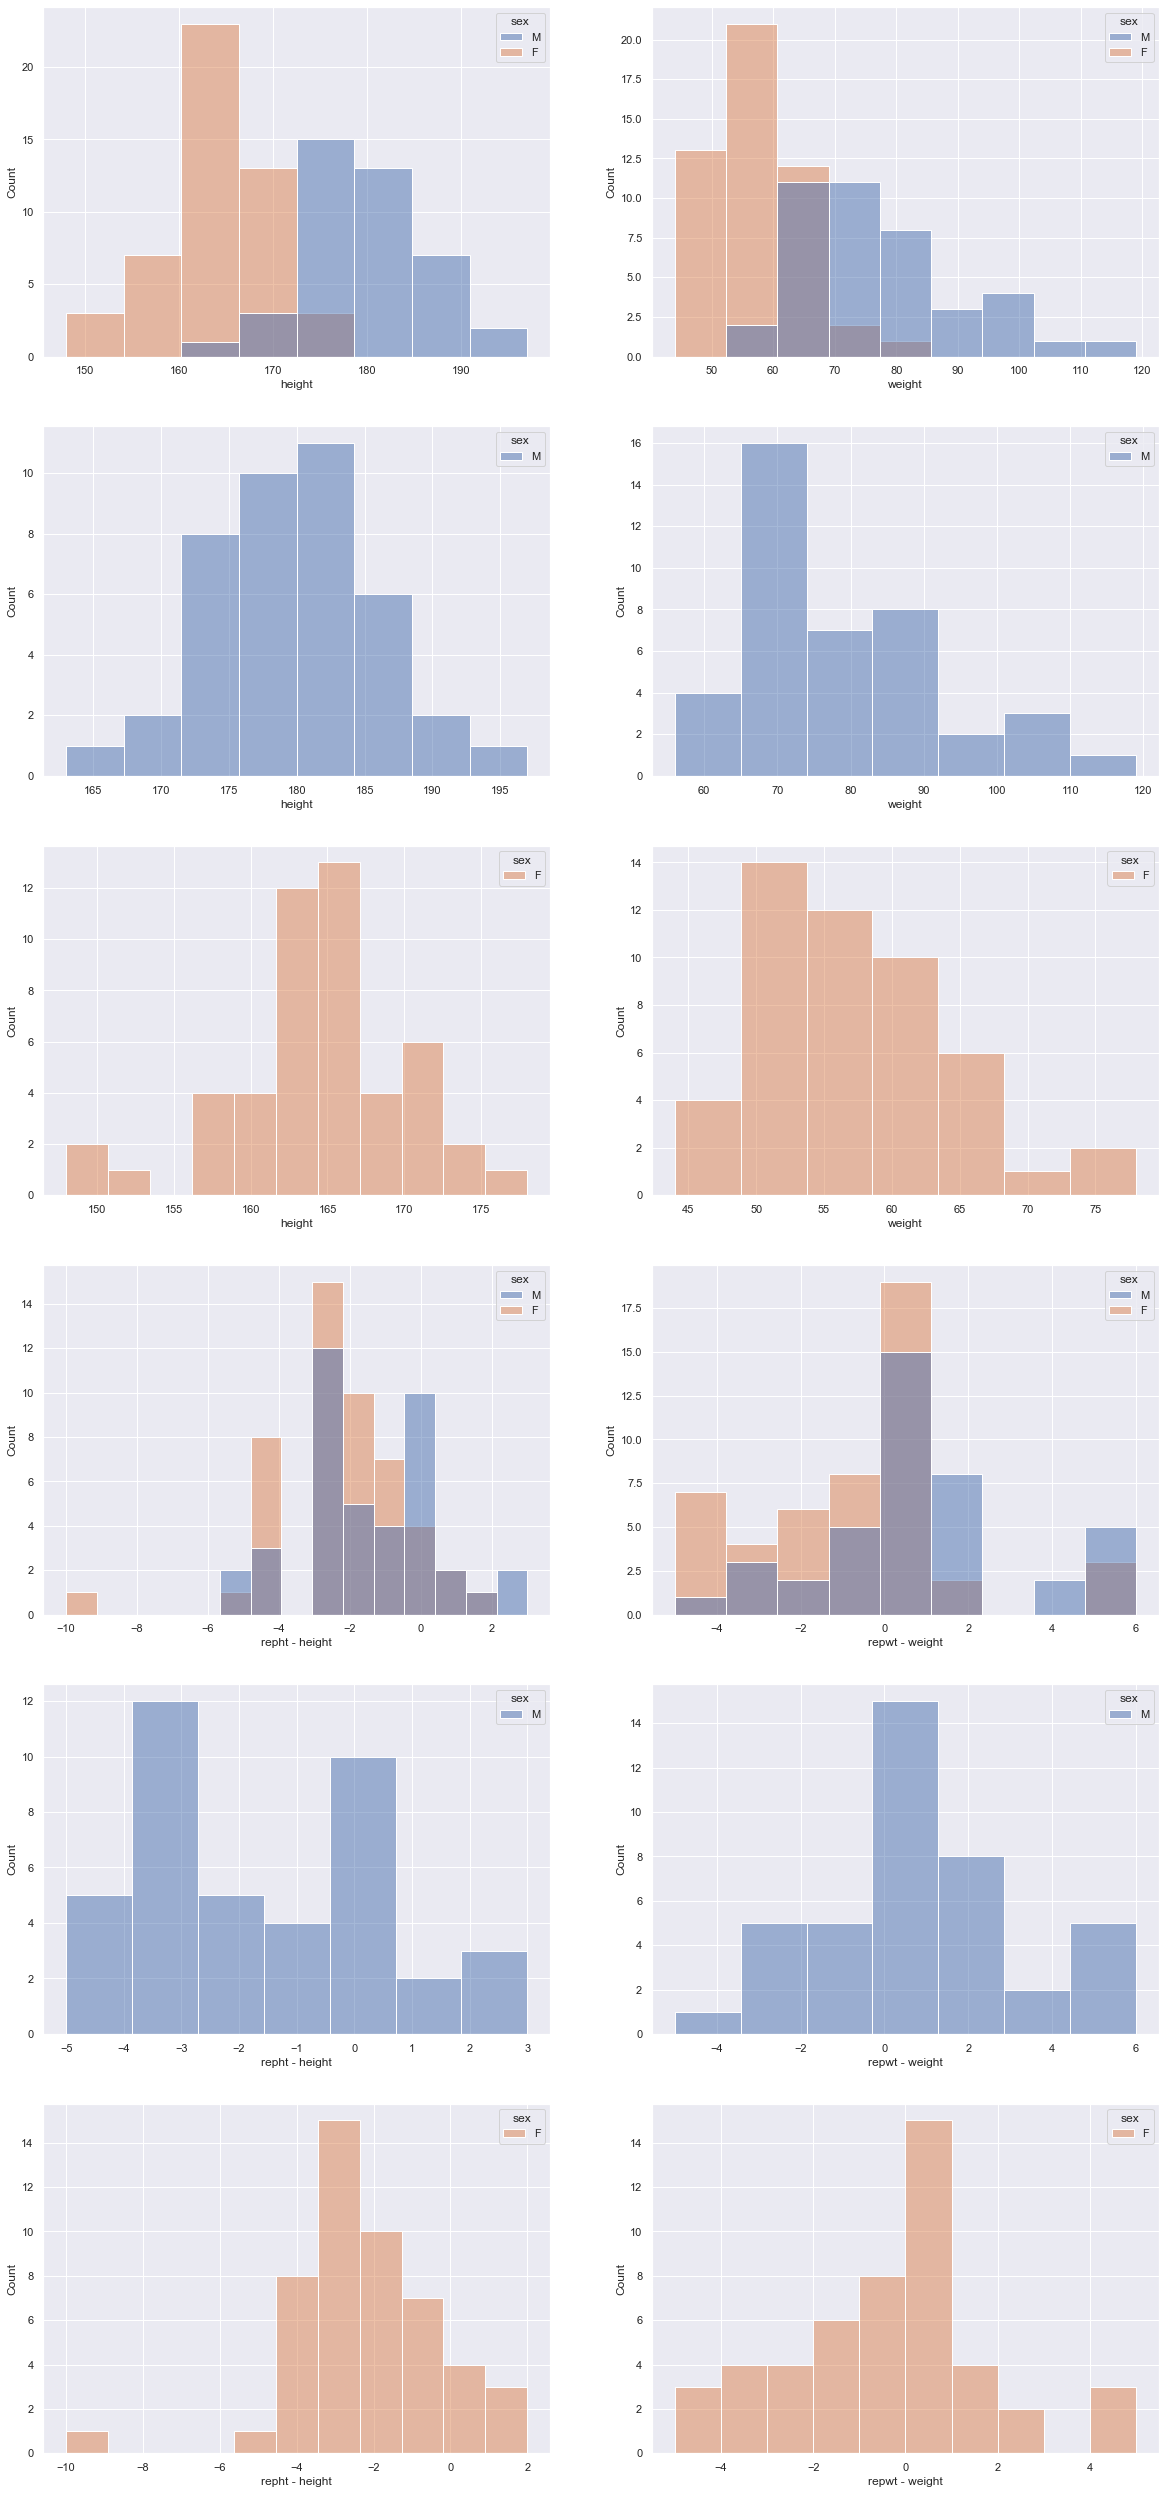

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 45));
female_palette = [sns.color_palette()[1]]
male_palette = [sns.color_palette()[0]]

attributes = ["height", "weight"]
make_hists(davis_df_train, attributes, 0)
make_hists(davis_df_train[davis_df_train.sex == 'M'], attributes, 1, male_palette)
make_hists(davis_df_train[davis_df_train.sex == 'F'], attributes, 2, female_palette)

attributes = ["repht - height", "repwt - weight"]
make_hists(davis_df_train, attributes, 3)
make_hists(davis_df_train[davis_df_train.sex == 'M'], attributes, 4, male_palette)
make_hists(davis_df_train[davis_df_train.sex == 'F'], attributes, 5, female_palette)

In [22]:
davis_df_train["sex"].replace({'M': 0, 'F': 1}, inplace=True)

#### <b>Построение генератора данных</b>

In [23]:
class PointGenerator:
    def __init__(self):
        self.p_female = None
        self.mean_height = {
            "female": None,
            "male": None
        }
        self.mean_weight = {
            "female": None,
            "male": None
        }
        self.covariance = {
            "female": None,
            "male": None
        }
    
    def fit(self, X_train):
        self.p_female = len(X_train[X_train.sex == 1]) / len(X_train)
        
        self.mean_height['female'] = X_train[X_train.sex == 1]["height"].mean()
        self.mean_height['male'] = X_train[X_train.sex == 0]["height"].mean()
        
        self.mean_weight['female'] = X_train[X_train.sex == 1]["weight"].mean()
        self.mean_weight['male'] = X_train[X_train.sex == 0]["weight"].mean()
        
        self.covariance['female'] = self.cov_matrix(X_train, 1)
        self.covariance['male'] = self.cov_matrix(X_train, 0)
        
    def cov_matrix(self, X_train, sex):
        return X_train[X_train.sex == sex][["height", "weight"]].cov()
    
    def generate_points(self, n_points):
        to_str = {
            1: 'female',
            0: 'male'
        }
        points = []
        for i in range(n_points):
            sex = ds.bernoulli.rvs(self.p_female)
            means = np.array([self.mean_height[to_str.get(sex)], self.mean_weight[to_str.get(sex)]])
            height, weight = scipy.stats.multivariate_normal(means, self.covariance[to_str.get(sex)]).rvs()
            points.append(np.array([sex, height, weight]))
        return np.array(points)
    
    def log_likelihood(self, X, sex):
        X = X[X.sex == sex][["height", "weight"]]
        result = scipy.stats.multivariate_normal.logpdf(X, mean=X.mean(), cov=X.cov()).sum()
        if sex == 'F':
            return result * self.p_female
        elif sex == 'M':
            return result * (1 - self.p_female)
        else:
            return None
        
    def mean_log_likelihood(self, X, sex):
        return self.log_likelihood(X, sex) / len(X)

In [24]:
generator = PointGenerator()

In [25]:
generator.fit(davis_df_train)

In [26]:
points = generator.generate_points(len(davis_df_train)).T

In [27]:
generated_df = pd.DataFrame({"sex": points[0], "height": points[1], "weight": points[2]})

In [28]:
generated_df["sex"].replace({0: 'M', 1: 'F'}, inplace=True)

In [29]:
davis_df_train["sex"].replace({0: 'M', 1: 'F'}, inplace=True)

<b>Сгенерированный датасет</b>

In [30]:
generated_df

,sex,height,weight
0,F,168.399059,62.851028
1,F,165.449699,57.352053
2,M,181.704063,78.604705
3,F,171.586444,62.358897
4,F,166.392094,71.877873
...,...,...,...
85,F,162.013964,50.113663
86,M,181.237482,68.358405
87,F,164.477354,66.752095
88,M,179.125800,68.059354


<b>Скаттер сгенерированного датасета</b>

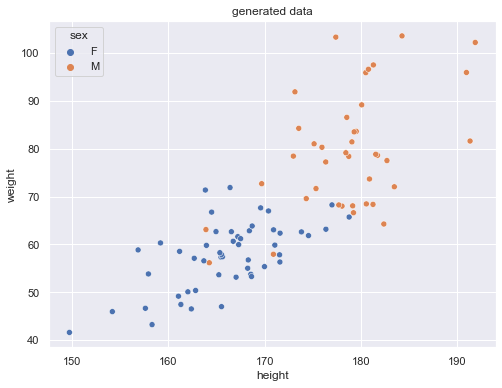

In [31]:
sns.scatterplot(data=generated_df, x="height", y="weight", hue='sex').set(title='generated data');

<b>Вычисляем правдоподобие данных на обучающей и тестовой выборках</b>

In [32]:
train_df = davis_df_train[davis_df_train.columns[:3]]
test_df = davis_df_test[davis_df_test.columns[:3]]

In [33]:
sex = 'F'

In [34]:
gen_data_mean_log = round(generator.mean_log_likelihood(generated_df, sex), 4)
train_data_mean_log = round(generator.mean_log_likelihood(train_df, sex), 4)
test_data_mean_log = round(generator.mean_log_likelihood(test_df, sex), 4)

In [35]:
display(Markdown(f"<b>Усредненный логарифм правдоподобия сгенерированнного датасета по полу {sex}: {gen_data_mean_log}</b>"))
display(Markdown(f"<b>Усредненный логарифм правдоподобия train-выборки по полу {sex}: {train_data_mean_log}</b>"))
display(Markdown(f"<b>Усредненный логарифм правдоподобия test-выборки по полу {sex}: {test_data_mean_log}</b>"))

<b>Усредненный логарифм правдоподобия сгенерированнного датасета по полу F: -1.9359</b>

<b>Усредненный логарифм правдоподобия train-выборки по полу F: -1.8749</b>

<b>Усредненный логарифм правдоподобия test-выборки по полу F: -1.8627</b>

### Задание 2

#### <b>а) Дана линейная модель вида:</b>

<font size="4.5">$\text{weight}=w_1 \cdot \text{height} + b$<br>
Далее $y=\text{weight}, x_1=\text{height}$</font>

#### <b>Поиск частных производных минимизируемого критерия</b>

<font size="4.5">$Q(w_1, b) = \frac{1}{n}\sum_{i=1}^{n} (y_i-w_1 x_1^{(i)}-b)^2$</font>

<font size="4.5">$\frac{\partial Q}{\partial w_1}=-\frac{2}{n}\sum_{i=1}^{n} x_1^{(i)}(y_i-w_1 x_1^{(i)}-b)$</font>

<font size="4.5">$\frac{\partial Q}{\partial b}=-\frac{2}{n}\sum_{i=1}^{n} (y_i-w_1 x_1^{(i)}-b)$</font>

#### <b>Реализация градиентного спуска</b>

In [36]:
w1_shifts, b_shifts = [], []

In [37]:
def optimize_params(x1, y, w1, b, alpha):
    n = len(x1)
    
    dQ_dw1 = (-2 / n) * np.array(x1 * (y - w1 * x1 - b)).sum()
    dQ_db = (-2 / n) * np.array(y - w1 * x1 - b).sum()
    
    w1 = w1 - alpha * dQ_dw1
    b = b - alpha * dQ_db
    
    return w1, b

In [38]:
def avg_loss(x1, y, w1, b):
    n = len(x1)
    loss = (1 / n) * np.array((y - w1 * x1 - b)**2).sum()
    return loss

In [39]:
def train(x1, y, w1, b, alpha, n_epochs):
    w1_shifts.append(w1)
    b_shifts.append(b)
    
    for epoch in range(n_epochs):
        w1, b = optimize_params(x1, y, w1, b, alpha)
        
        w1_shifts.append(w1)
        b_shifts.append(b)
        
        if epoch % 50 == 0:
            display(Markdown((f"<b>epoch: {epoch}, loss: {avg_loss(x1, y, w1, b)}</b>")))
    return w1, b

In [40]:
norm_x1 = (train_df.height - train_df["height"].mean()) / train_df["height"].std()
norm_y = (train_df.weight - train_df["weight"].mean()) / train_df["weight"].std()

In [41]:
w1, b = train(norm_x1, norm_y, 0, 0.2, 0.01, 301)

<b>epoch: 0, loss: 1.0038576209433947</b>

<b>epoch: 50, loss: 0.4733329023148936</b>

<b>epoch: 100, loss: 0.40146282861694493</b>

<b>epoch: 150, loss: 0.3917263157873376</b>

<b>epoch: 200, loss: 0.3904072349221814</b>

<b>epoch: 250, loss: 0.39022852371832195</b>

<b>epoch: 300, loss: 0.39020431095957286</b>

In [42]:
display(Markdown(f"<b>Вычисленные параметры:</b><br> $w_1 = {w1}, b = {b}$"))

<b>Вычисленные параметры:</b><br> $w_1 = 0.7761801114325738, b = 0.0004571711109180356$

In [43]:
def predict_weight(height, w1, b):
    return w1 * height + b

In [44]:
predicted_weights = predict_weight(norm_x1, w1, b)

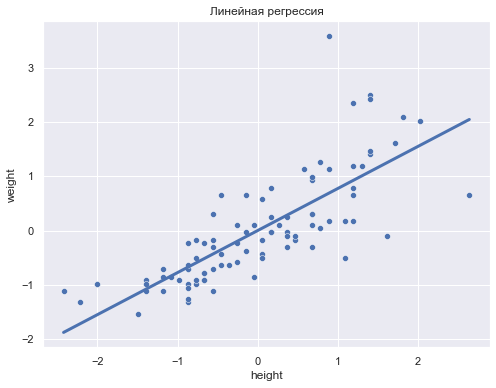

In [45]:
sns.lineplot(x=norm_x1, y=predicted_weights, linewidth=3).set(title="Линейная регрессия", xlabel="height", ylabel="weight");
sns.scatterplot(x=norm_x1, y=norm_y);

In [46]:
w1_shifts = np.array(w1_shifts)
b_shifts = np.array(b_shifts)

In [47]:
params_shifts = np.array(list(zip(b_shifts, w1_shifts)))

In [48]:
x = np.linspace(-0.2, 1, 100)
y = np.linspace(-0.1, 1, 100)

In [49]:
Q = np.zeros(shape=(x.size, y.size))

In [50]:
for i, x0 in enumerate(x):
    for j, y0 in enumerate(y):
        Q[i, j] = avg_loss(norm_x1, norm_y, x0, y0)

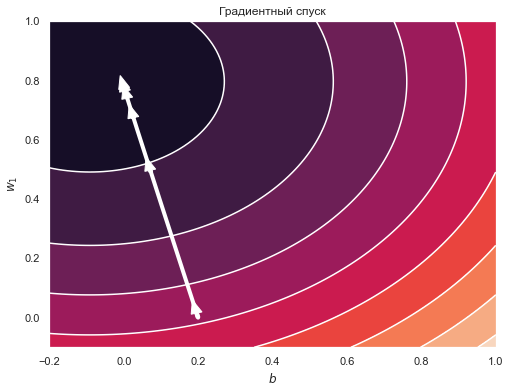

In [51]:
plt.contourf(x, y, Q);
plt.contour(x, y, Q, colors='w');
for i in range(len(params_shifts) - 2):
    if i % 50 == 0:
        x1, y1 = params_shifts[i]
        x2, y2 = params_shifts[i + 1]
        dx, dy = x2 - x1, y2 - y1
        width = 0.01
        head_width = 3 * width
        head_length = 1.5 * head_width
        plt.arrow(x1, y1, dx, dy, width=width, color='w', head_length=head_length, head_width=head_width)
plt.plot(b_shifts, w1_shifts, color='w', linewidth=4);
plt.title("Градиентный спуск");
plt.xlabel('$b$');
plt.ylabel('$w_1$');

#### <b>б) Дана линейная модель вида:</b>

<font size="4.5">$\text{weight}=w_1 \cdot \text{height} + w_2 \cdot [\text{sex = M}] + b$<br>
Далее $y=\text{weight}, x_1=\text{height}$</font>

#### <b>Поиск частных производных минимизируемого критерия</b>

<font size="4.5">$Q(w_1, w_2, b) = \frac{1}{n}\sum_{i=1}^{n} (y_i-w_1 x_1^{(i)}-w_2 \cdot \text{[sex = M]} - b)^2$</font>

<font size="4.5">$\frac{\partial Q}{\partial w_1}=-\frac{2}{n}\sum_{i=1}^{n} x_1^{(i)}(y_i-w_1 x_1^{(i)}-w_2 \cdot \text{[sex = M]} - b)$</font>

<font size="4.5">$\frac{\partial Q}{\partial w_2}=-\frac{2}{n}\sum_{i=1}^{n} \text{[sex = M]} \cdot (y_i-w_1 x_1^{(i)}-w_2 \cdot \text{[sex = M]} - b)$</font>

<font size="4.5">$\frac{\partial Q}{\partial b}=-\frac{2}{n}\sum_{i=1}^{n} (y_i-w_1 x_1^{(i)}-w_2 \cdot \text{[sex = M]} - b)$</font>

In [52]:
w1_shifts, w2_shifts, b_shifts = [], [], []

In [53]:
def optimize_params(x1, y, w1, w2, b, s, alpha):
    n = len(x1)
    
    dQ_dw1 = (-2 / n) * np.array(x1 * (y - w1 * x1 - w2 * s - b)).sum()
    dQ_dw2 = (-2 / n) * np.array(s * (y - w1 * x1 - w2 * s - b)).sum()
    dQ_db = (-2 / n) * np.array(y - w1 * x1 - w2 * s - b).sum()
    
    w1 = w1 - alpha * dQ_dw1
    w2 = w2 - alpha * dQ_dw2
    b = b - alpha * dQ_db
    
    return w1, w2, b

In [54]:
def avg_loss(x1, y, w1, w2, b, s):
    n = len(x1)
    loss = (1 / n) * np.array((y - w1 * x1 - w2 * s - b)**2).sum()
    return loss

In [55]:
def train(x1, y, w1, w2, b, s, alpha, n_epochs):
    w1_shifts.append(w1)
    w2_shifts.append(w2)
    b_shifts.append(b)
    
    for epoch in range(n_epochs):
        w1, w2, b = optimize_params(x1, y, w1, w2, b, s, alpha)
        
        w1_shifts.append(w1)
        w2_shifts.append(w2)
        b_shifts.append(b)
        
        if epoch % 50 == 0:
            display(Markdown((f"<b>epoch: {epoch}, loss: {avg_loss(x1, y, w1, w2, b, s)}</b>")))
    return w1, w2, b

In [56]:
s = train_df["sex"].replace({'M': 1, 'F': 0})

In [57]:
norm_x1 = (train_df.height - train_df["height"].mean()) / train_df["height"].std()
norm_y = (train_df.weight - train_df["weight"].mean()) / train_df["weight"].std()

In [58]:
w1, w2, b = train(norm_x1, norm_y, 0, 0, 0, s, 0.01, 501)

<b>epoch: 0, loss: 0.9610098370318834</b>

<b>epoch: 50, loss: 0.4384532548144954</b>

<b>epoch: 100, loss: 0.3846416144877199</b>

<b>epoch: 150, loss: 0.3782535264053416</b>

<b>epoch: 200, loss: 0.3773114711093104</b>

<b>epoch: 250, loss: 0.3770627401750944</b>

<b>epoch: 300, loss: 0.37692033444166423</b>

<b>epoch: 350, loss: 0.37680646175507515</b>

<b>epoch: 400, loss: 0.37670895422066897</b>

<b>epoch: 450, loss: 0.37662452814923</b>

<b>epoch: 500, loss: 0.37655130221398614</b>

In [59]:
w1, w2, b

(0.6595957254581193, 0.30987529622031407, -0.13874496469319114)

In [60]:
def predict_weight(height, w1, w2, b, s):
    return w1 * height + w2 * s + b

In [61]:
predicted_weights = predict_weight(norm_x1, w1, w2, b, s)

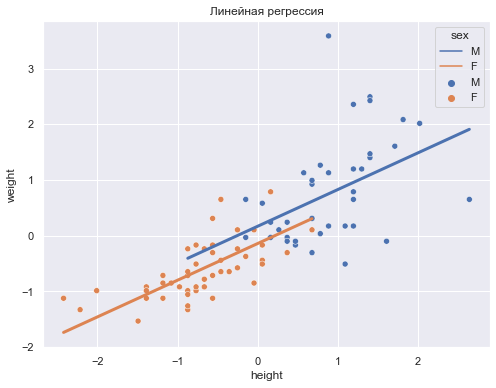

In [62]:
sns.scatterplot(x=norm_x1, y=norm_y, hue=train_df.sex);
sns.lineplot(x=norm_x1, y=predicted_weights, hue=train_df.sex, linewidth=3).set(title='Линейная регрессия');